In [3]:
import os
dir = os.getcwd()
dir

'/home/rahuliyer/code/hramzan01/market/notebooks'

In [4]:
! mkdir -p data

In [5]:
url = 'https://files.energy-stats.uk/csv_output/'

csv_list = ['csv_agile_C_London.csv', 'csv_agileoutgoing_C_London.csv', 'csv_tracker_C_London.csv']



for file in csv_list:
    file_path = os.path.join(url, file)
    !curl {file_path} -o data/{file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5017k  100 5017k    0     0  2353k      0  0:00:02  0:00:02 --:--:-- 2354k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3912k  100 3912k    0     0  1573k      0  0:00:02  0:00:02 --:--:-- 1573k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61040  100 61040    0     0   128k      0 --:--:-- --:--:-- --:--:--  127k


In [6]:
! tree

.
├── data
│   ├── csv_agile_C_London.csv
│   ├── csv_agileoutgoing_C_London.csv
│   └── csv_tracker_C_London.csv
├── eda_dataset.ipynb
├── energy-price.ipynb
├── project_brief.ipynb
└── weather_data.ipynb

1 directory, 7 files


In [7]:
import pandas as pd
csv_name = ['csv_agile_C_London', 'csv_agileoutgoing_C_London', 'csv_tracker_C_London']

for i in range(len(csv_name)):
    csv_path = os.path.join(dir, 'data',csv_list[i])
    print(f'loading {csv_path}')
    csv_name[i] = pd.read_csv(csv_path)

loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_agile_C_London.csv
loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_agileoutgoing_C_London.csv
loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_tracker_C_London.csv


In [8]:
csv_agile_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[0]))
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[1]))
csv_tracker_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[2]))

In [9]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']

In [10]:
csv_agile_C_London.shape, csv_agileoutgoing_C_London.shape, csv_tracker_C_London.shape

((106221, 5), (84671, 5), (1265, 5))

In [11]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

for df in df_list:
    df.columns = column_names

In [12]:
csv_agile_C_London['date_time'] = pd.to_datetime(csv_agile_C_London['date_time'])
csv_agile_C_London.head()

,date_time,time,Letter,City,Price
0,2018-02-21 00:30:00+00:00,00:30,C,London,10.0695
1,2018-02-21 01:00:00+00:00,01:00,C,London,10.1640
2,2018-02-21 01:30:00+00:00,01:30,C,London,9.7020
3,2018-02-21 02:00:00+00:00,02:00,C,London,9.6600
4,2018-02-21 02:30:00+00:00,02:30,C,London,9.7125


In [13]:
csv_agileoutgoing_C_London['date_time'] = pd.to_datetime(csv_agileoutgoing_C_London['date_time'])
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [14]:
csv_tracker_C_London['date_time'] = pd.to_datetime(csv_tracker_C_London['date_time'])
csv_tracker_C_London.head()

,date_time,time,Letter,City,Price
0,2021-01-02 00:00:00+00:00,00:00,C,London,15.17
1,2021-01-03 00:00:00+00:00,00:00,C,London,14.47
2,2021-01-04 00:00:00+00:00,00:00,C,London,14.72
3,2021-01-05 00:00:00+00:00,00:00,C,London,14.74
4,2021-01-06 00:00:00+00:00,00:00,C,London,25.27


In [15]:
csv_tracker_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date_time  1265 non-null   datetime64[ns, UTC]
 1   time       1265 non-null   object             
 2   Letter     1265 non-null   object             
 3   City       1265 non-null   object             
 4   Price      1265 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 49.5+ KB


In [16]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

for df in df_list:
    df.set_index('date_time', inplace=True)

In [17]:
csv_agile_C_London.head()

,time,Letter,City,Price
date_time,,,,
2018-02-21 00:30:00+00:00,00:30,C,London,10.0695
2018-02-21 01:00:00+00:00,01:00,C,London,10.1640
2018-02-21 01:30:00+00:00,01:30,C,London,9.7020
2018-02-21 02:00:00+00:00,02:00,C,London,9.6600
2018-02-21 02:30:00+00:00,02:30,C,London,9.7125


In [18]:
csv_agileoutgoing_C_London.head()

,time,Letter,City,Price
date_time,,,,
2019-05-15 23:30:00+00:00,00:30,C,London,4.24
2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2019-05-16 00:30:00+00:00,01:30,C,London,4.24
2019-05-16 01:00:00+00:00,02:00,C,London,4.24
2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [19]:
csv_tracker_C_London.head()

,time,Letter,City,Price
date_time,,,,
2021-01-02 00:00:00+00:00,00:00,C,London,15.17
2021-01-03 00:00:00+00:00,00:00,C,London,14.47
2021-01-04 00:00:00+00:00,00:00,C,London,14.72
2021-01-05 00:00:00+00:00,00:00,C,London,14.74
2021-01-06 00:00:00+00:00,00:00,C,London,25.27


In [20]:
csv_tracker_C_London.index

DatetimeIndex(['2021-01-02 00:00:00+00:00', '2021-01-03 00:00:00+00:00',
               '2021-01-04 00:00:00+00:00', '2021-01-05 00:00:00+00:00',
               '2021-01-06 00:00:00+00:00', '2021-01-07 00:00:00+00:00',
               '2021-01-08 00:00:00+00:00', '2021-01-09 00:00:00+00:00',
               '2021-01-10 00:00:00+00:00', '2021-01-11 00:00:00+00:00',
               ...
               '2024-03-03 00:00:00+00:00', '2024-03-04 00:00:00+00:00',
               '2024-03-05 00:00:00+00:00', '2024-03-06 00:00:00+00:00',
               '2024-03-07 00:00:00+00:00', '2024-03-08 00:00:00+00:00',
               '2024-03-09 00:00:00+00:00', '2024-03-10 00:00:00+00:00',
               '2024-03-11 00:00:00+00:00', '2024-03-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date_time', length=1265, freq=None)

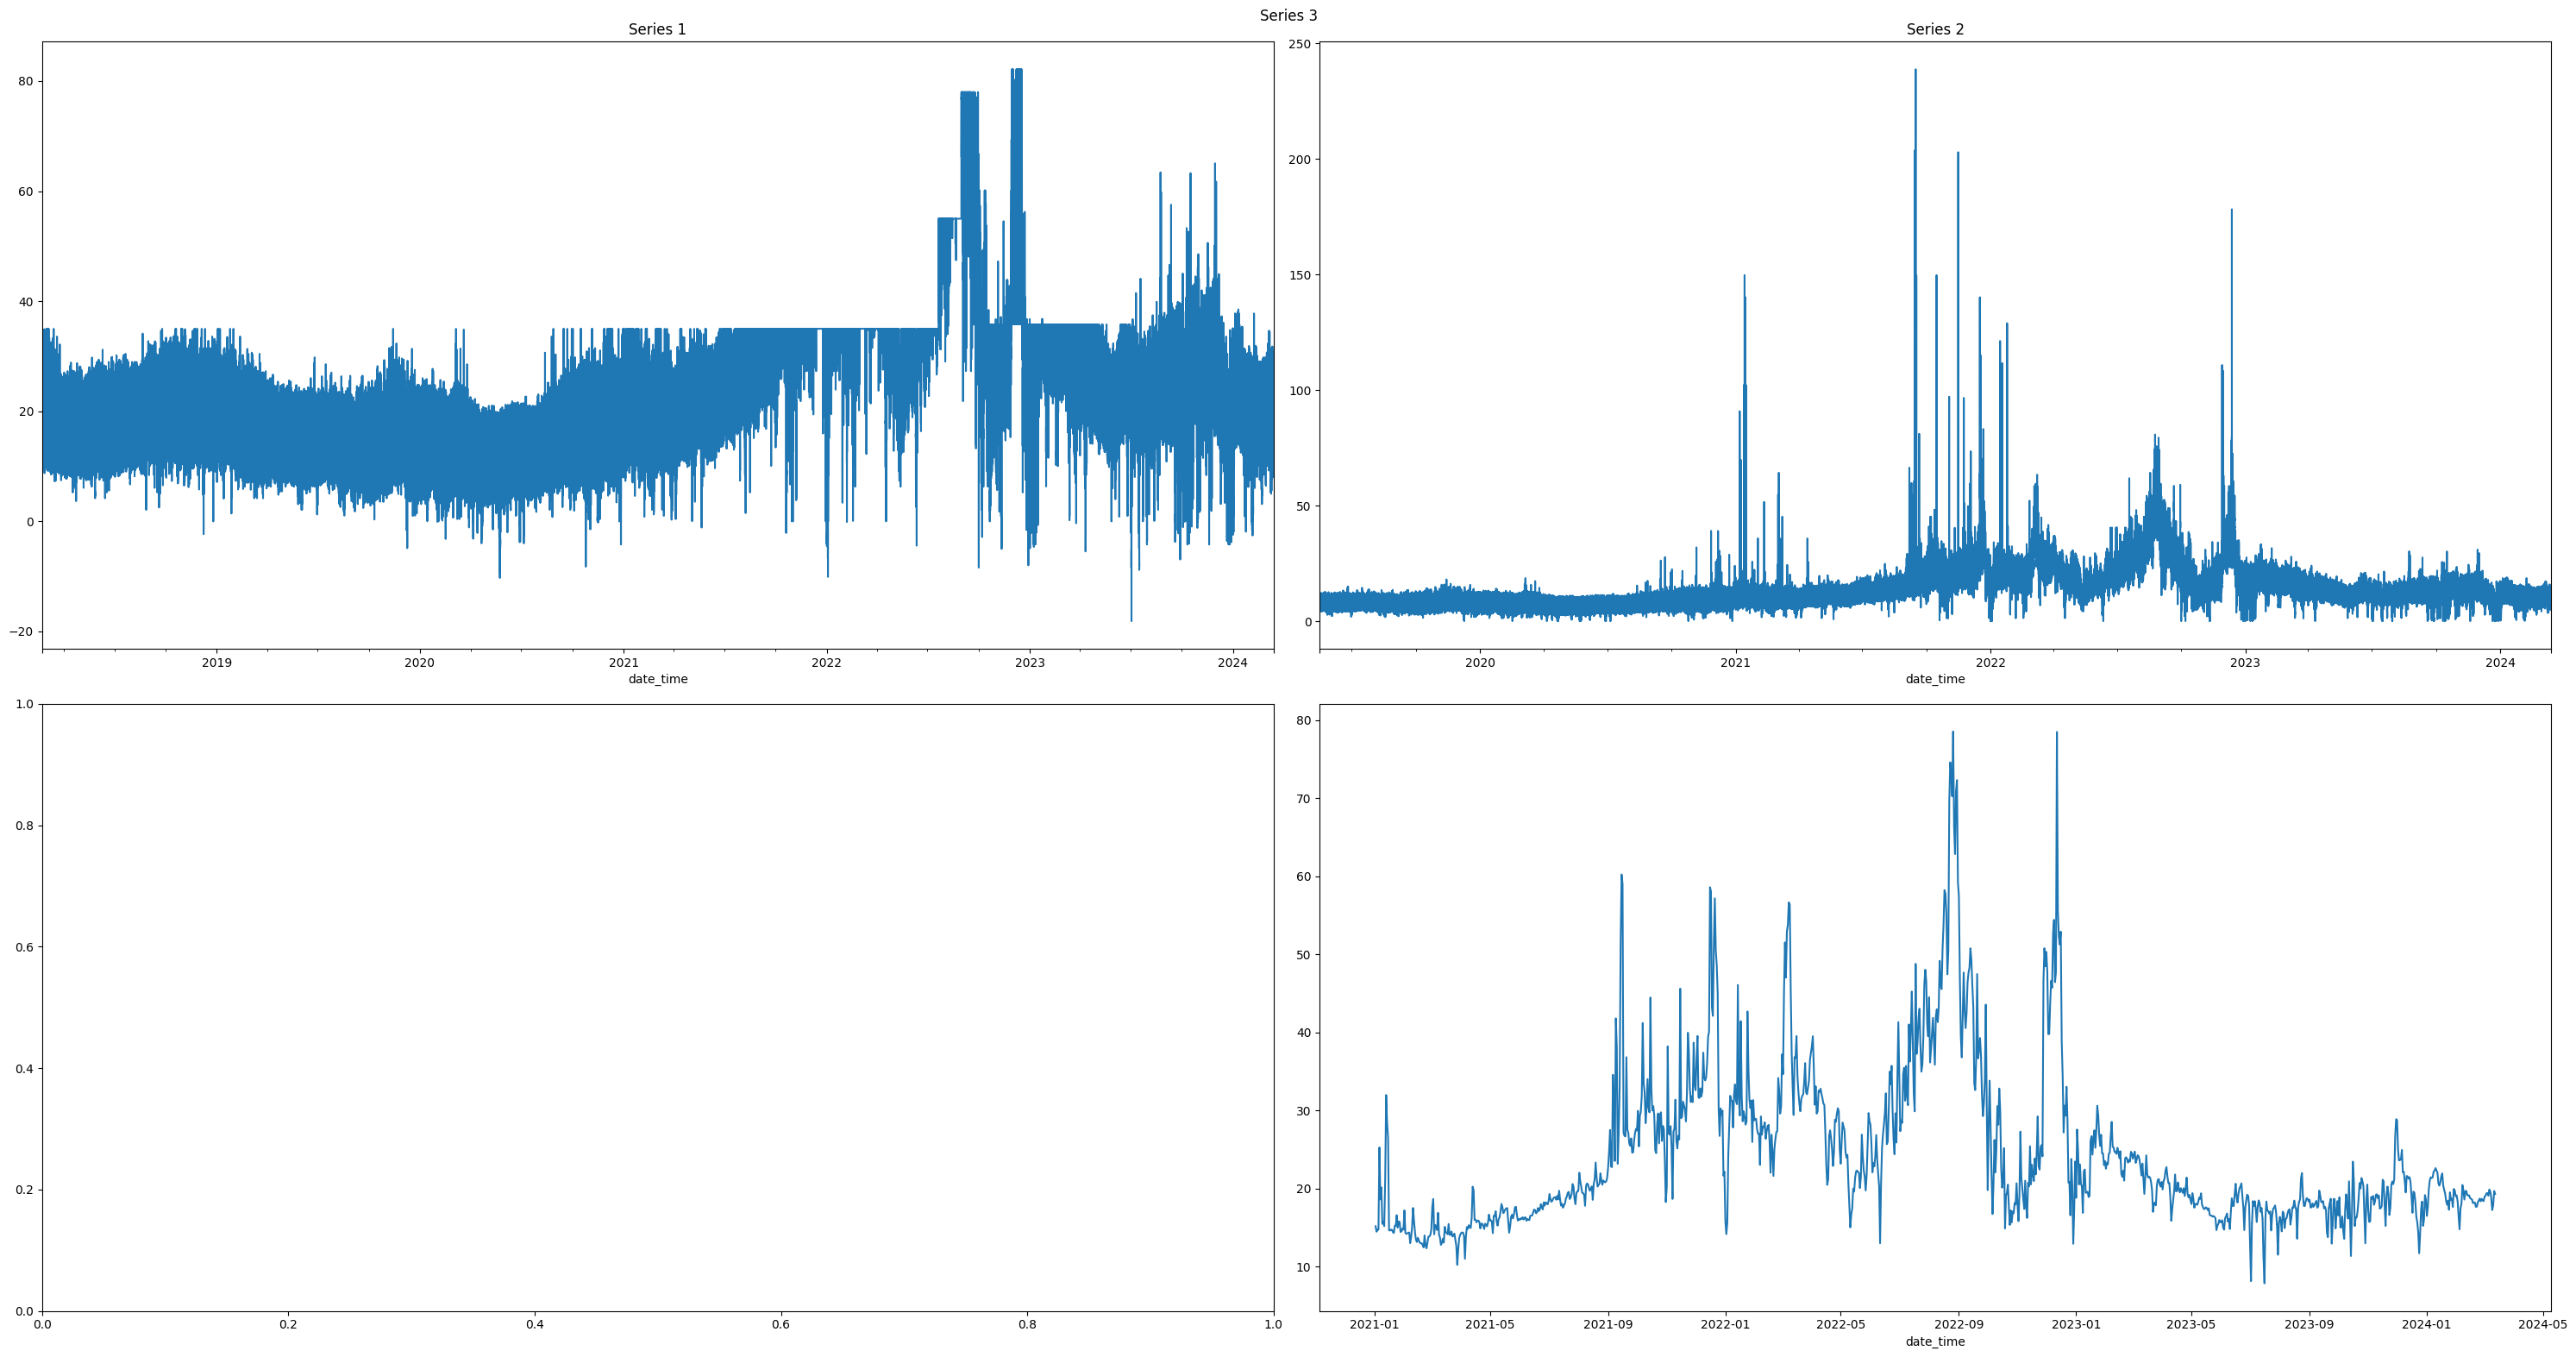

In [21]:
import matplotlib.pyplot as plt

df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

fig, axs = plt.subplots(2, 2, figsize=(30, 16))

csv_agile_C_London['Price'].plot(ax=axs[0, 0], title='Series 1')
csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

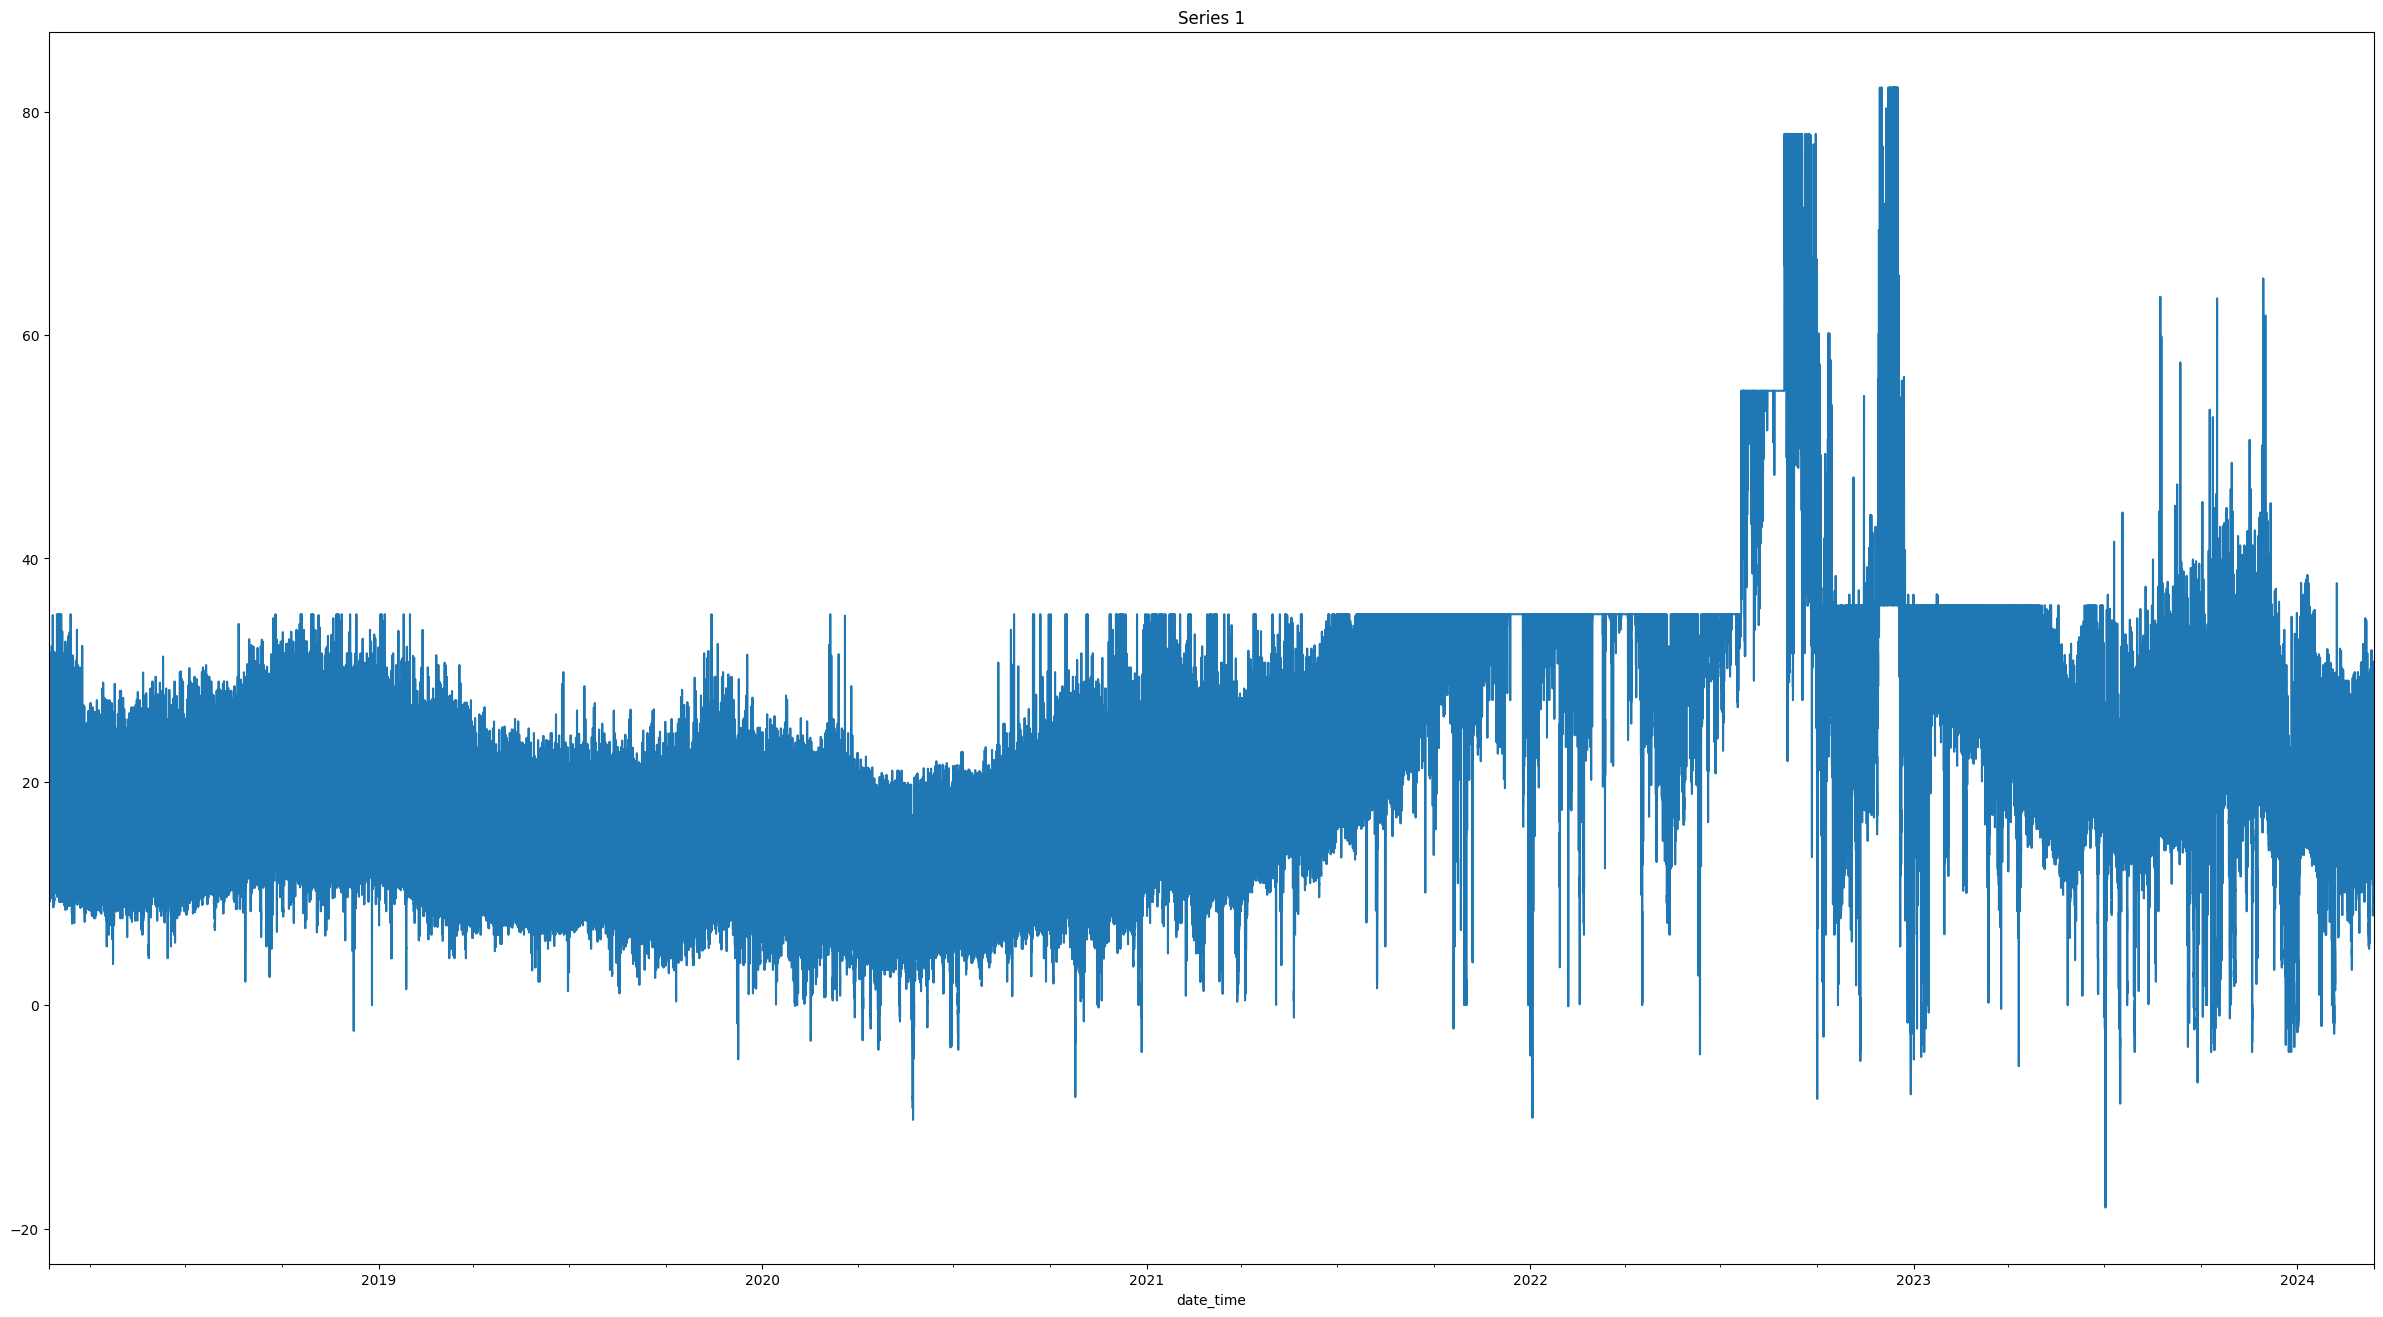

In [22]:
plt.figure(figsize=(30, 16))

csv_agile_C_London['Price'].plot(title='Series 1')

plt.show()

In [36]:
csv_agileoutgoing_C_London.head(10)

,time,Letter,City,Price
date_time,,,,
2019-05-15 23:30:00+00:00,00:30,C,London,4.24
2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2019-05-16 00:30:00+00:00,01:30,C,London,4.24
2019-05-16 01:00:00+00:00,02:00,C,London,4.24
2019-05-16 01:30:00+00:00,02:30,C,London,4.24
2019-05-16 02:00:00+00:00,03:00,C,London,4.24
2019-05-16 02:30:00+00:00,03:30,C,London,4.24
2019-05-16 03:00:00+00:00,04:00,C,London,4.24
2019-05-16 03:30:00+00:00,04:30,C,London,4.24


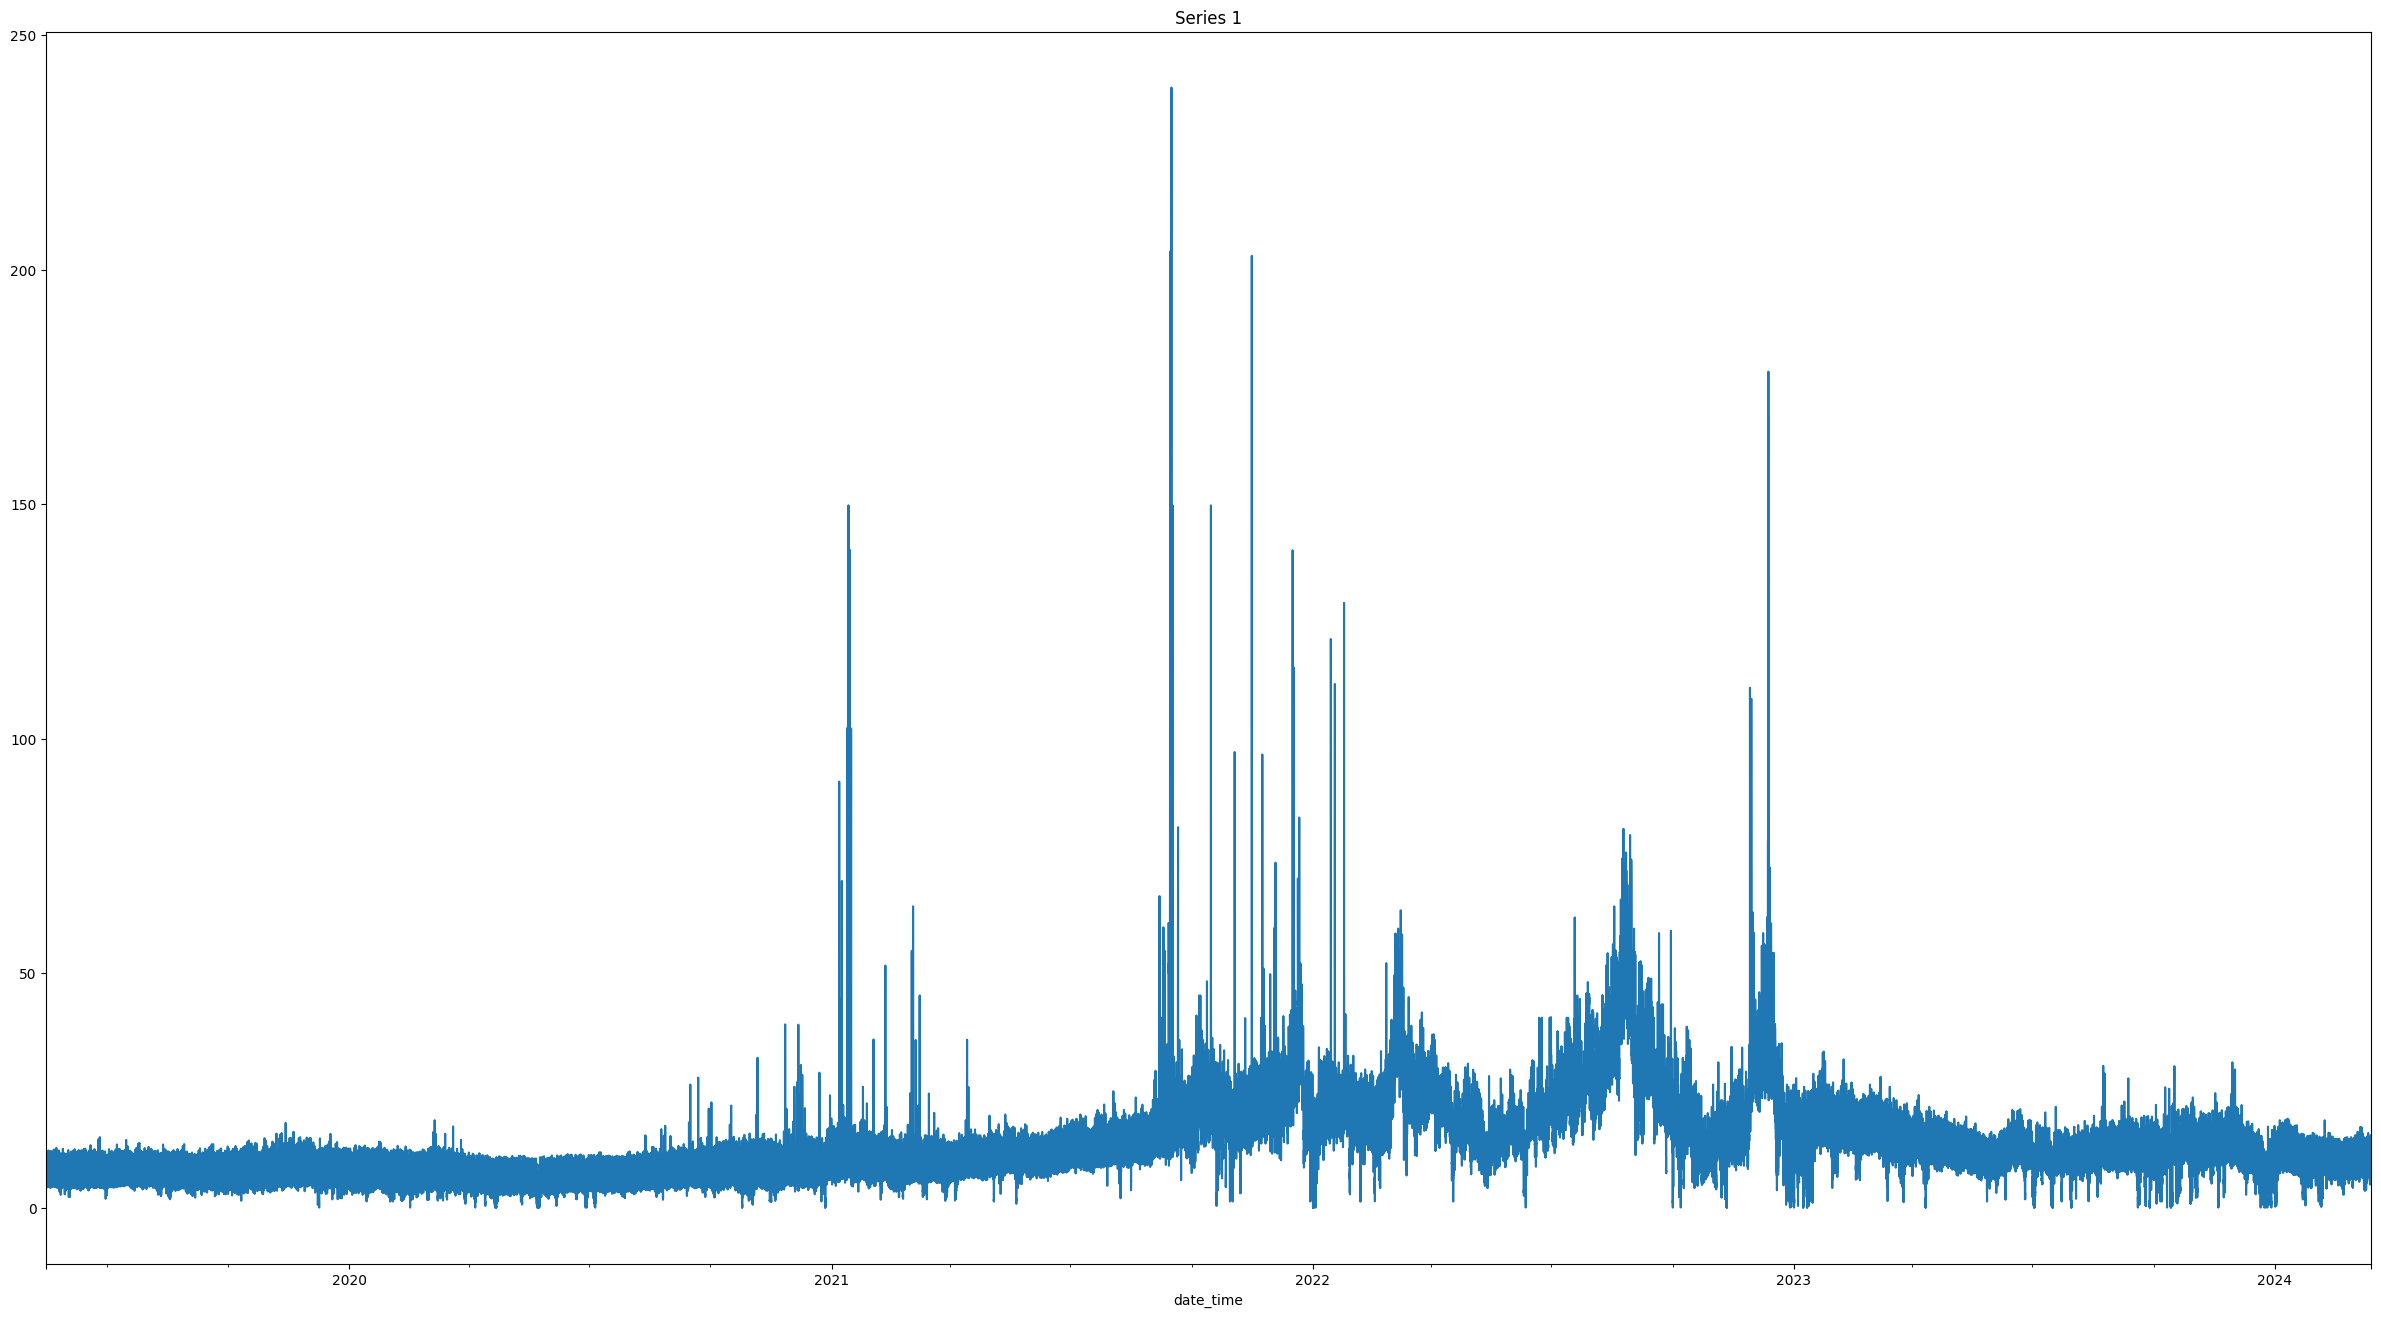

In [23]:
plt.figure(figsize=(30, 16))

csv_agileoutgoing_C_London['Price'].plot(title='Series 1')

plt.show()
# csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
# csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

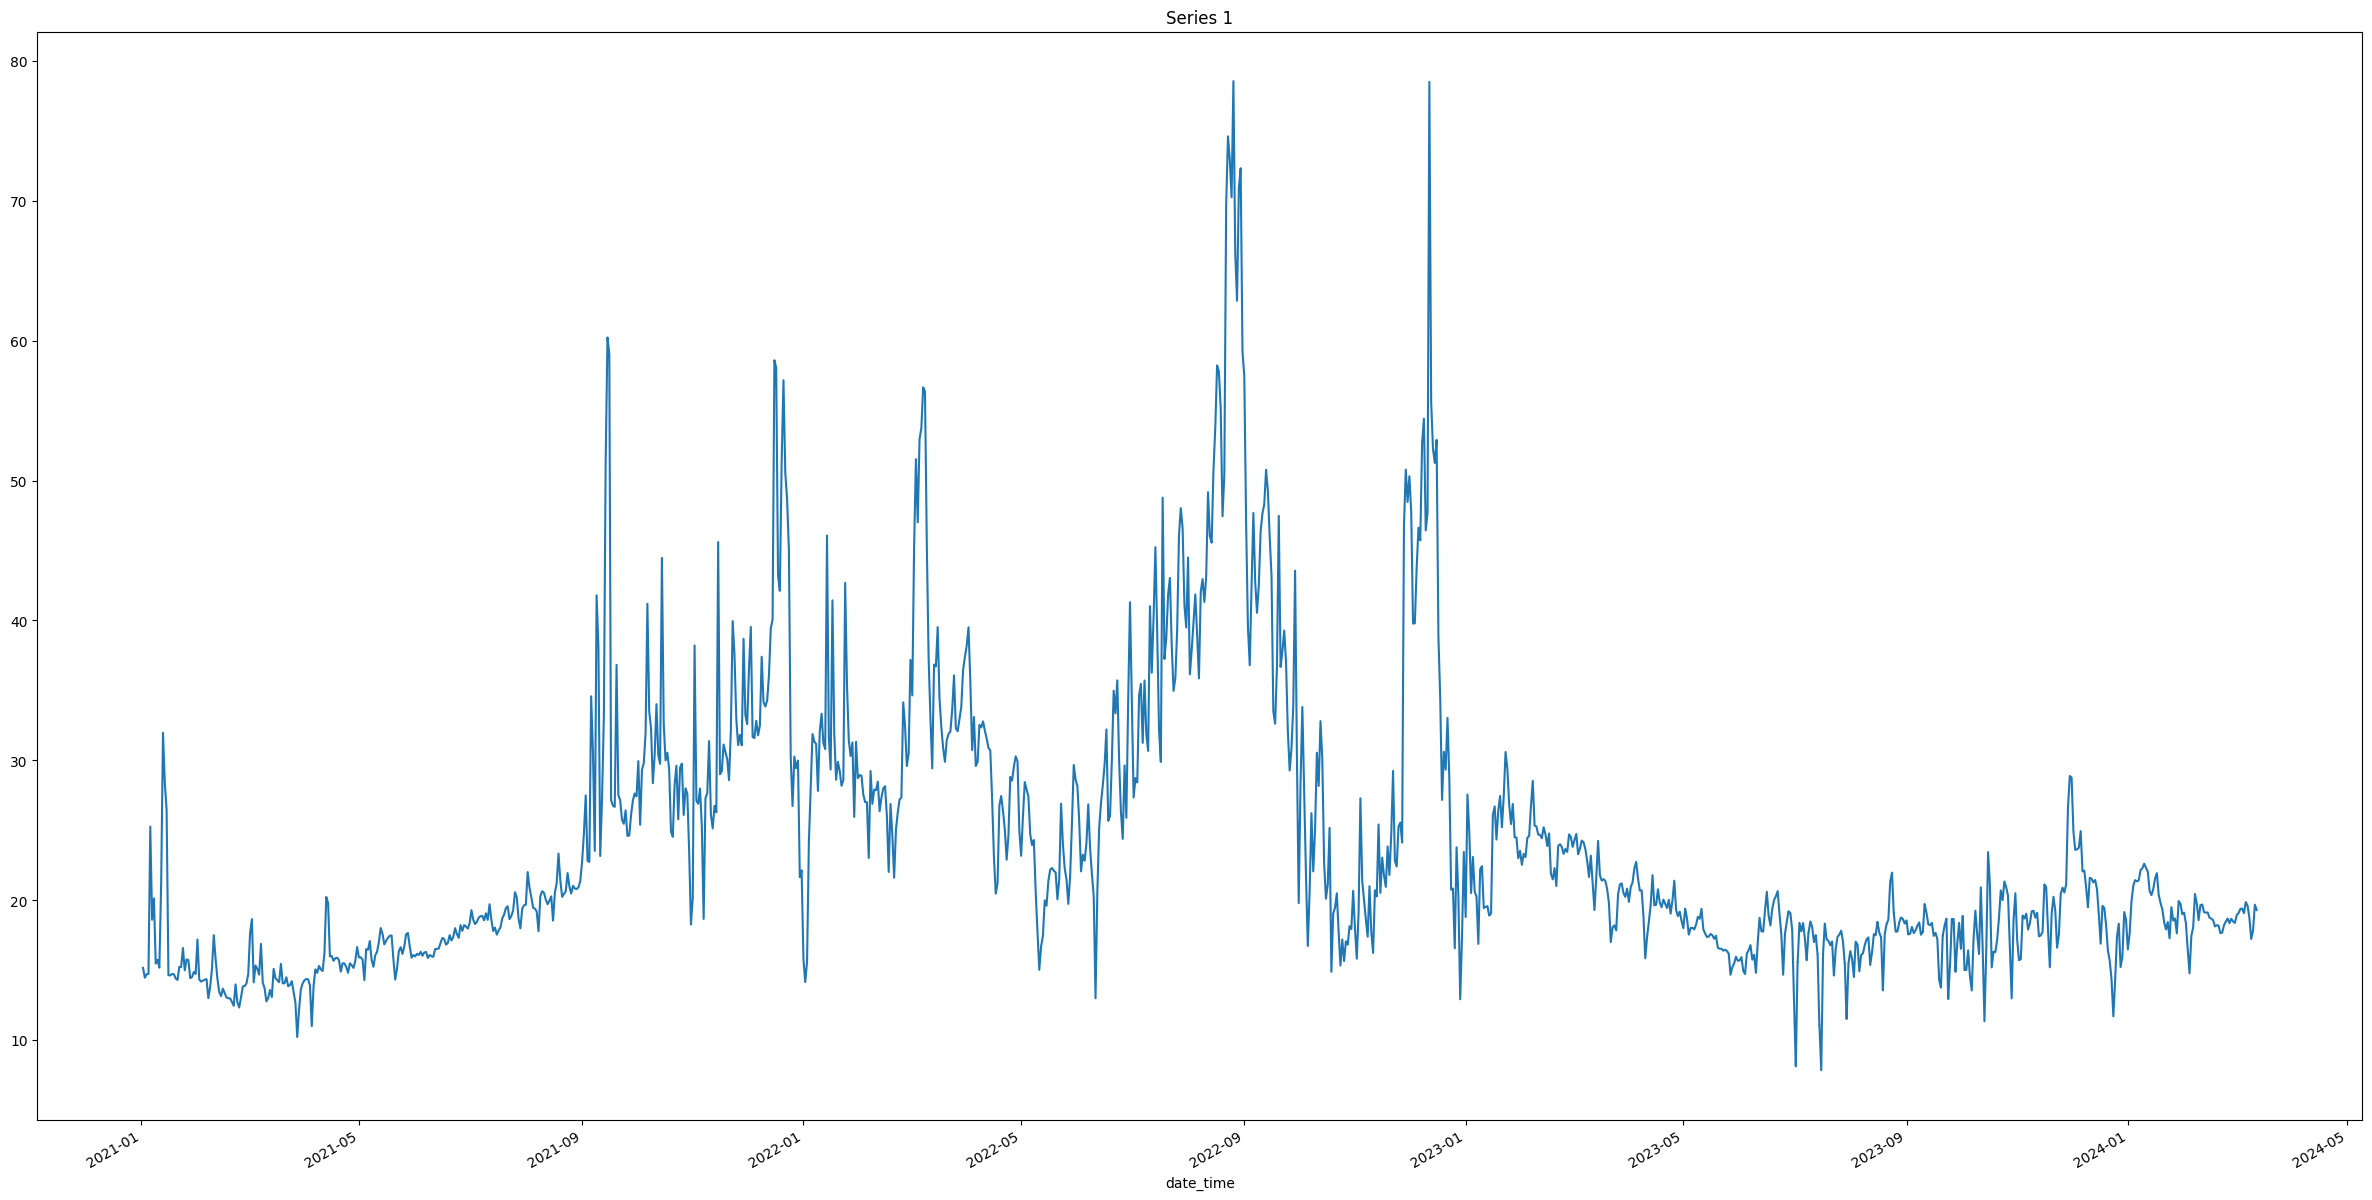

In [24]:
plt.figure(figsize=(30, 16))

csv_tracker_C_London['Price'].plot(title='Series 1')

plt.show()
# csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
# csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

In [25]:
csv_agile_C_London.shape, csv_agileoutgoing_C_London.shape, csv_tracker_C_London.shape

((106221, 4), (84671, 4), (1265, 4))

In [26]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

df_list[0].index.min(), df_list[0].index.max()

(Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
 Timestamp('2024-03-13 22:30:00+0000', tz='UTC'))

In [27]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

min_time_list=[]
max_time_list=[]

for df in df_list:
    min_time_list.append(df.index.min())
    max_time_list.append(df.index.max())

min(min_time_list), max(max_time_list)

(Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
 Timestamp('2024-03-13 22:30:00+0000', tz='UTC'))

In [28]:
min_time_list, max_time_list

([Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
  Timestamp('2019-05-15 23:30:00+0000', tz='UTC'),
  Timestamp('2021-01-02 00:00:00+0000', tz='UTC')],
 [Timestamp('2024-03-13 22:30:00+0000', tz='UTC'),
  Timestamp('2024-03-13 22:30:00+0000', tz='UTC'),
  Timestamp('2024-03-12 00:00:00+0000', tz='UTC')])

In [29]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]
df_list[0].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-13 22:00:00+00:00,22:00,C,London,11.550
2024-03-13 22:30:00+00:00,22:30,C,London,10.395


In [30]:
df_list[1].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-13 22:00:00+00:00,22:00,C,London,6.52
2024-03-13 22:30:00+00:00,22:30,C,London,6.00


In [31]:
df_list[2].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-11 00:00:00+00:00,00:00,C,London,19.6875
2024-03-12 00:00:00+00:00,00:00,C,London,19.3095


In [32]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106221 entries, 2018-02-21 00:30:00+00:00 to 2024-03-13 22:30:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    106221 non-null  object 
 1   Letter  106221 non-null  object 
 2   City    106221 non-null  object 
 3   Price   106221 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.1+ MB


In [33]:
df_list[0]['Price'].describe()

count    106221.000000
mean         18.727937
std          12.536637
min         -18.123000
25%           9.261000
50%          14.679000
75%          26.922000
max          82.143285
Name: Price, dtype: float64

In [34]:
df_list[1]['Price'].describe()

count    84671.000000
mean        11.655103
std          9.248239
min          0.000000
25%          5.350000
50%          9.180000
75%         15.080000
max        238.800000
Name: Price, dtype: float64

In [35]:
df_list[2]['Price'].describe()

count    1265.000000
mean       23.708099
std        10.168006
min         7.860000
25%        17.350000
50%        19.929000
75%        27.570000
max        78.550000
Name: Price, dtype: float64

In [ ]:
# import requests

# url = 'https://api.bmreports.com'
# response = requests.get(url).json()

In [42]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

colour_list = ['red', 'green', 'blue']

# plt.figure(figsize=(25, 25))

# for i, df in enumerate(df_list):
#     # plt.scatter(x=df.index, y=df['Price'])
#     df['Price'].plot(title=df, color = colour_list[i])
#     # csv_tracker_C_London['Price'].plot(title='Series 1')

# # Add title and legend and xlim
# # start_date = pd.to_datetime('2018-02-21 00:30:00+00:00')
# # end_date = pd.to_datetime('2024-03-08 22:30:00+00:00')
# # plt.xlim(start_date, end_date)
# # plt.xticks([start_date, end_date])
# plt.title('Overlay of Three plots')

# # Show the plot
# plt.show()

In [38]:
df_agileoutgoing_C_London = pd.DataFrame(data = csv_agileoutgoing_C_London['Price'])

In [41]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London.index
df_agileoutgoing_C_London.columns = ['y', 'ds']
df_agileoutgoing_C_London.head()


,y,ds
date_time,,
2019-05-15 23:30:00+00:00,4.24,2019-05-15 23:30:00+00:00
2019-05-16 00:00:00+00:00,4.24,2019-05-16 00:00:00+00:00
2019-05-16 00:30:00+00:00,4.24,2019-05-16 00:30:00+00:00
2019-05-16 01:00:00+00:00,4.24,2019-05-16 01:00:00+00:00
2019-05-16 01:30:00+00:00,4.24,2019-05-16 01:30:00+00:00


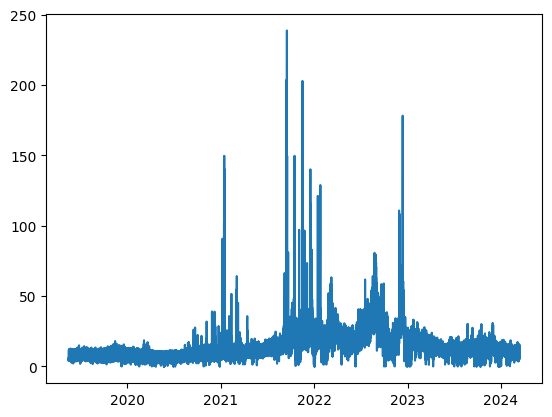

In [43]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [70]:
# df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')
# Assuming 'ds' column has timezone information
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')


In [71]:
split_ratio = round(df_agileoutgoing_C_London.shape[0]*0.8)
split_ratio, df_agileoutgoing_C_London.shape

(67737, (84671, 2))

In [72]:
train = df_agileoutgoing_C_London.iloc[:split_ratio]
test = df_agileoutgoing_C_London.iloc[split_ratio:]

In [73]:
check = len(train)+len(test)
check

84671

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [74]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

19:57:27 - cmdstanpy - INFO - Chain [1] start processing
19:58:12 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
horizon = 365

future = model.make_future_dataframe(periods = horizon, freq='D')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
68097,2024-03-22 03:30:00,-1.041678,-143.776783,161.692887
68098,2024-03-23 03:30:00,-0.949439,-126.812179,145.245979
68099,2024-03-24 03:30:00,-0.825186,-111.416677,125.377395
68100,2024-03-25 03:30:00,-1.013893,-131.321967,143.539134
68101,2024-03-26 03:30:00,-1.168795,-153.267048,161.329255


In [76]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
68097,2024-03-22 03:30:00,-1.041678,-143.776783,161.692887
68098,2024-03-23 03:30:00,-0.949439,-126.812179,145.245979
68099,2024-03-24 03:30:00,-0.825186,-111.416677,125.377395
68100,2024-03-25 03:30:00,-1.013893,-131.321967,143.539134
68101,2024-03-26 03:30:00,-1.168795,-153.267048,161.329255


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


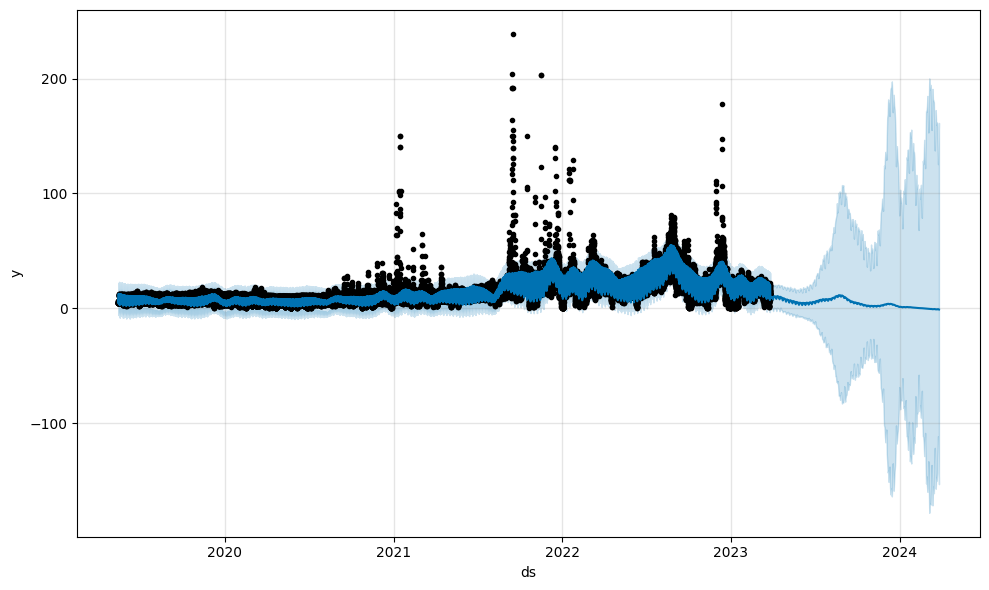

In [77]:
ax = model.plot(forecast)

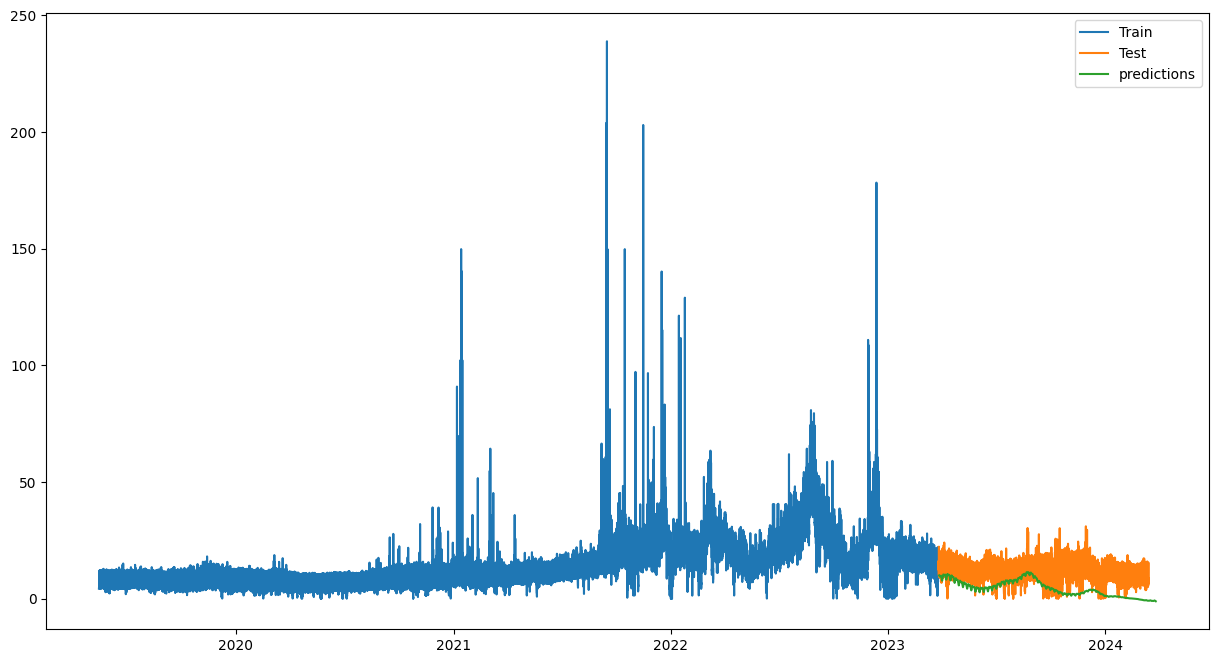

In [78]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.legend(loc='best')
plt.show()

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

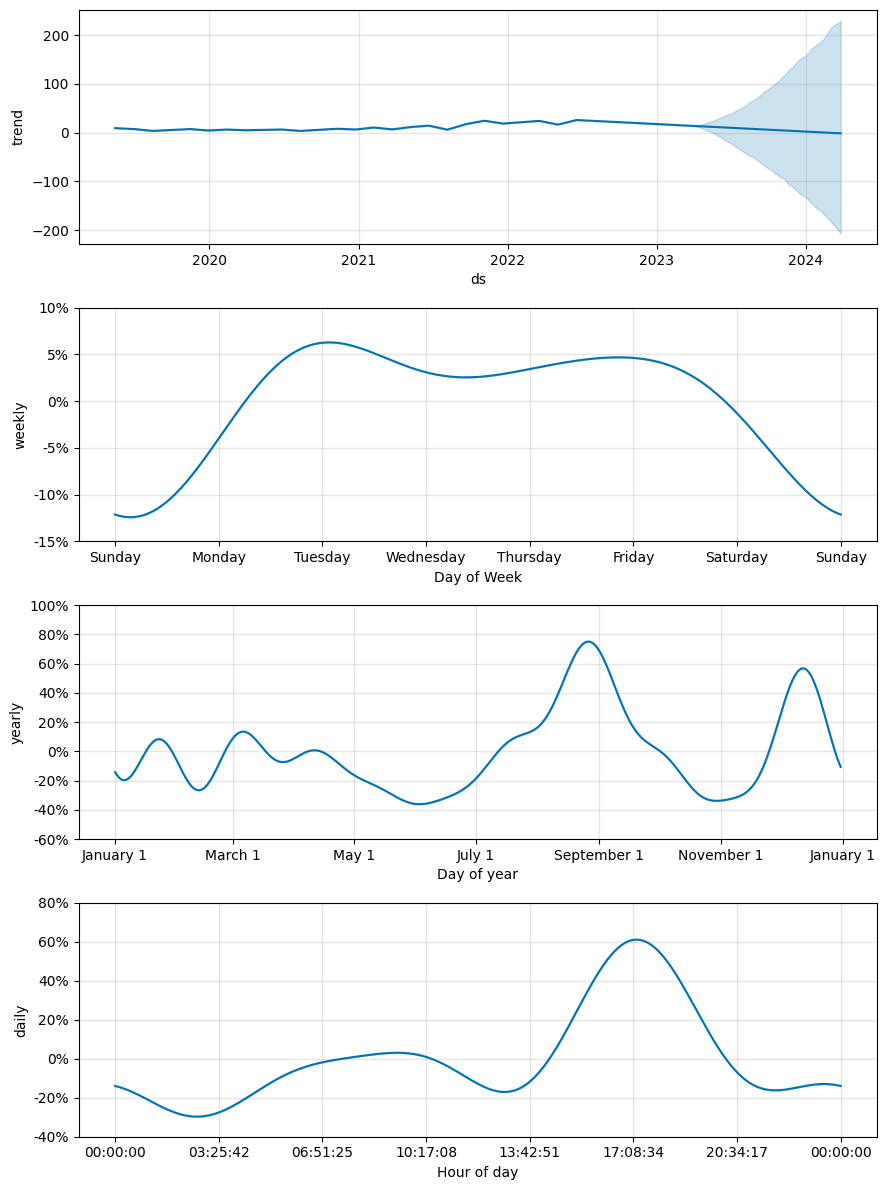

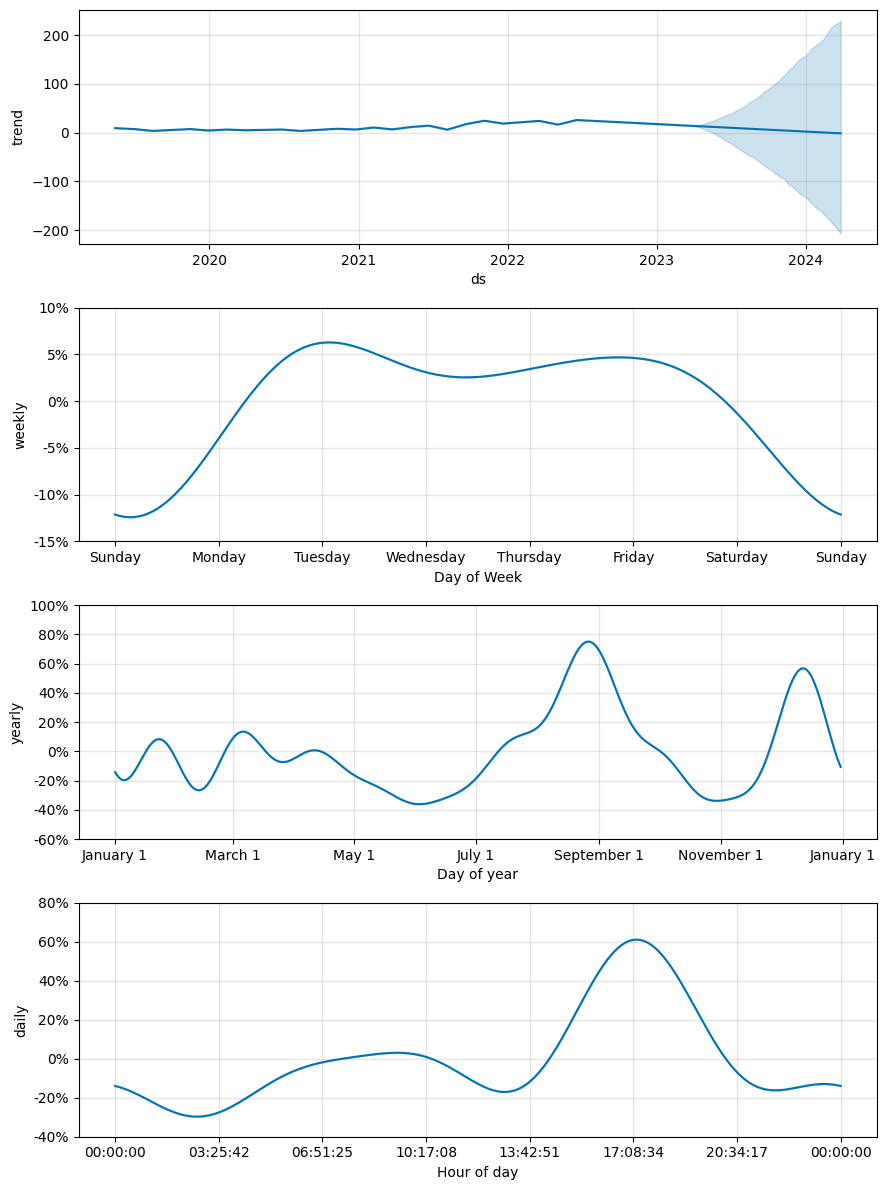

In [79]:
model.plot_components(forecast)